In [ ]:

# Replace 'your_file.tif' with the path to your GeoTIFF file



import matplotlib.pyplot as plt



import rasterio
import matplotlib.pyplot as plt
import numpy as np
import rasterio.plot
from rasterio.plot import show
import xarray as xr
# Read the GeoTIFF file


with rasterio.open(tif_path) as src:
    # Read the data into a numpy array
    data = src.read(1)  # Read the first band
    # Get the metadata
    meta = src.meta
    # Convert the numpy array 'data' to an xarray DataArray
    da = xr.DataArray(data, dims=("y", "x"))

    meta["nodata"] = 0

    # Create a Dataset and save as NetCDF
    ds = xr.Dataset({"band1": da})
    ds.attrs.update(meta)  # Optionally, add all metadata to the dataset as well
    ds.to_netcdf("output.nc")


TypeError: Invalid value for attr 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 7N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'). For serialization to netCDF files, its value must be of one of the following types: str, Number, ndarray, number, list, tuple, bytes

In [ ]:
import rioxarray
from pathlib import Path

tiff_file = Path("RCM3_SC30MD_20241122_025835_HH_HV_SEGXy.tif")

with rioxarray.open_rasterio(tiff_file, nodata=0) as src:
    src.to_netcdf(tiff_file.stem + ".nc", )


AttributeError: 'DataArray' object has no attribute 'data_vars'

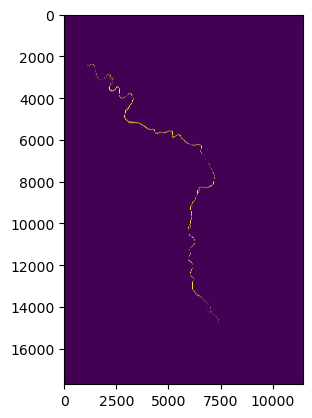

In [4]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("RCM3_SC30MD_20241122_025835_HH_HV_SEGXy.nc") as src:
    data = src.read(1)  # Read the first band
    plt.imshow(data)